In [ ]:
import pandas as pd


Importando arquivos

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.columns

In [ ]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'}

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
#visualizacao
gorjetas.head()

In [ ]:
gorjetas.sobremesa.unique()

In [ ]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)


In [ ]:
gorjetas.head()

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [ ]:
gorjetas.head()

Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
!pip show seaborn

Valor da Conta e da Gorjeta

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

In [ ]:
gorjetas.count()

Criando o Campo Porcentagem

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem',kind='line',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

In [ ]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

In [ ]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

In [ ]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',kind='line',data=gorjetas)

Teste de Hipótese

A distribuição da taxa de gorjeta é a mesma nos dois grupos

A distribuição da taxa de gorjeta não é a mesma nos dois grupos

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r= ranksums(sobremesa,sem_sobremesa)

In [ ]:
print('O valor do p-value é {}/z'.format(r.pvalue))
print('Como o p-value ficou acima de 0,05, isso quer dizer que nao foi descartado a primeira hipotese')

In [ ]:
ranksums(sobremesa,sem_sobremesa)

Análise 3 - Dia Da Semana

In [44]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

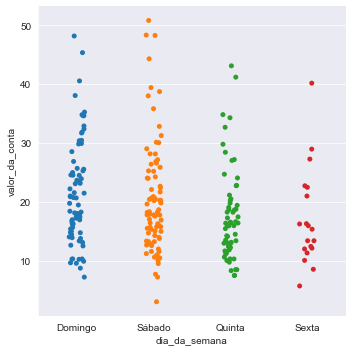

In [45]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

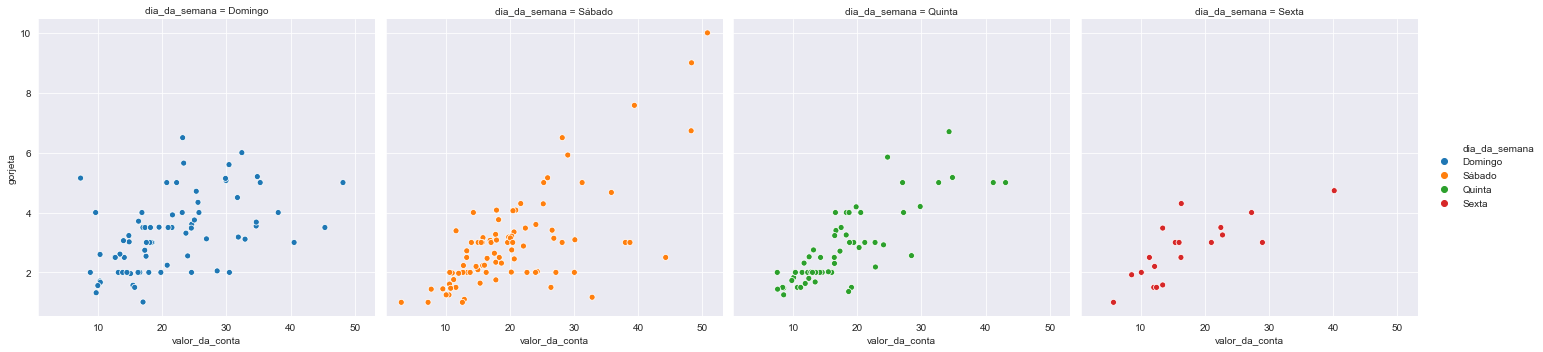

In [47]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

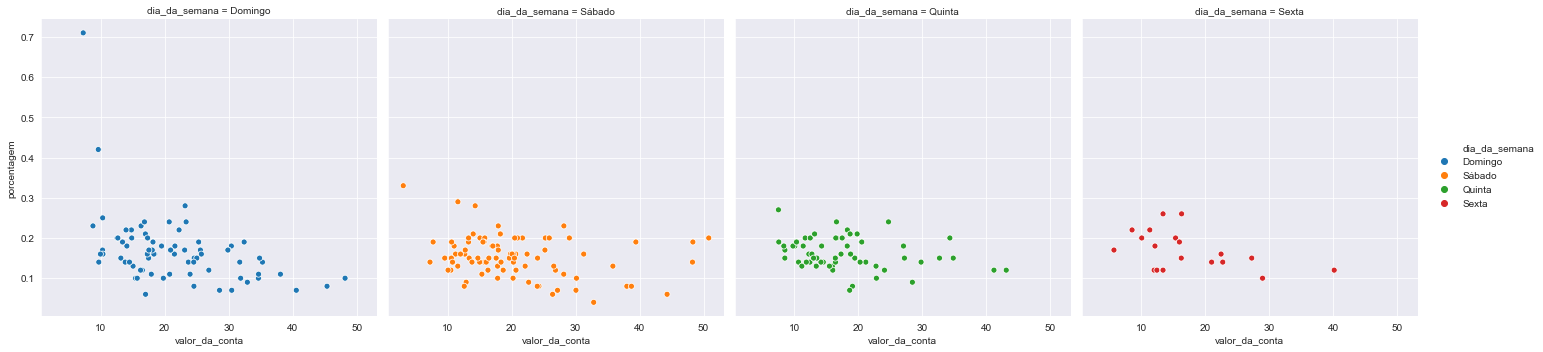

In [49]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

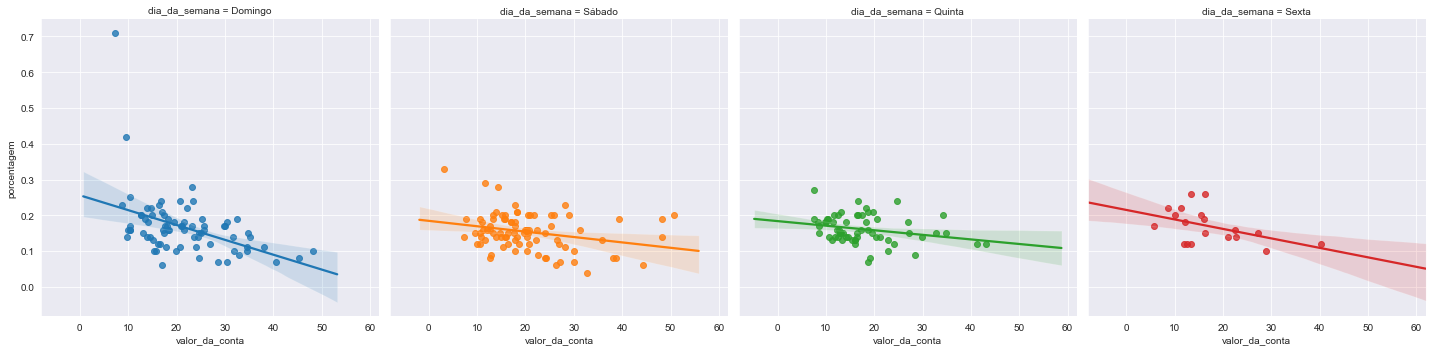

In [50]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [53]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [55]:
print(f'A Media geral das gorjetas é de {media_geral_gorjetas}')

A Media geral das gorjetas é de 2.9982786885245902


In [57]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [59]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

Teste de Hipótese

Hnull = A distribuição do valor da conta é igual no sábado e no domingo

Halt = A distribuição do valor da conta não é igual no sábado e no domingo

In [64]:
valor_conta_domingo = gorjetas.query("dia_da_semana=='Domingo'").valor_da_conta

In [63]:
valor_conta_sabado = gorjetas.query("dia_da_semana=='Sábado'").valor_da_conta

In [67]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443
